Develop process data function that takes in dataframe

In [1]:
import numpy as np

In [3]:
# Original
def _process_data(self): # Scale features between -1 / 1
    prices = self.df.loc[:, 'Close'].to_numpy()
    #prices[self.frame_bound[0] - self.window_size]  # validate index (TODO: Improve validation)
    #prices = prices[self.frame_bound[0]-self.window_size:self.frame_bound[1]]
    diff = np.insert(np.diff(prices), 0, 0)
    signal_features = np.column_stack((prices, diff))

    return prices.astype(np.float32), signal_features.astype(np.float32)


In [ ]:
# for simple case
def _process_data(self):
    start = self.frame_bound[0] - self.window_size
    end = self.frame_bound[1]
    prices = self.df.loc[:, 'HE'].to_numpy()[start:end]
    signal_features = self.df.loc[:, ['HE']].to_numpy()[start:end] # only has HE price
    return prices, signal_features


In [ ]:
# https://github.com/AminHP/gym-anytrading
def my_process_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'Open', 'High', 'Low']].to_numpy()[start:end]
    return prices, signal_features


In [2]:
import pandas as pd

# Specify the path to the HDF5 file
input_file = "AEP_PSGC1_AMP_dart_Oct20.h5"  # Change this to the path of your HDF5 file

# Load data from HDF5 file
loaded_data = pd.read_hdf(input_file, key="data")

# Display the loaded data
print(loaded_data)


c:\Users\chen5\miniforge3\envs\rl_env2\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


                                                   RT_LMP  DA_LMP
MARKET_DAY NODE          TYPE    VALUE HourEnding                
2020-10-01 AEP.PSGC1.AMP Gennode LMP   1            10.02   14.33
                                       2            12.51   13.09
                                       3            12.79   12.96
                                       4            12.53   13.62
                                       5            13.43   14.49
...                                                   ...     ...
2024-03-31 AEP.PSGC1.AMP Gennode LMP   20           21.35   26.38
                                       21           20.99   25.07
                                       22           13.76   21.15
                                       23           14.66   19.03
                                       24           13.74   19.63

[30672 rows x 2 columns]


C:\Users\chen5\AppData\Local\Temp\ipykernel_28656\2558073340.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_AEP_PSGC1_AMP = loaded_data

In [46]:
loaded_data

RT_LMP  DA_LMP
MARKET_DAY NODE          TYPE    VALUE HourEnding                
2020-10-01 AEP.PSGC1.AMP Gennode LMP   1            10.02   14.33
                                       2            12.51   13.09
                                       3            12.79   12.96
                                       4            12.53   13.62
                                       5            13.43   14.49
...                                                   ...     ...
2024-03-31 AEP.PSGC1.AMP Gennode LMP   20           21.35   26.38
                                       21           20.99   25.07
                                       22           13.76   21.15
                                       23           14.66   19.03
                                       24           13.74   19.63

[30672 rows x 2 columns]

In [ ]:
# New
def _process_data(self):
    start = self.frame_bound[0] - self.window_size
    end = self.frame_bound[1]
    prices = self.df.loc[:, 'RT_LMP'].to_numpy()[start:end]
    # See the Day Ahead price"forecast" for 10 hours ahead 
    # (DA LMPs are released at 2pm and apply to the 24 hours of the next day, 
    #   so 10 future hours are always available)
    da_prices = self.df.loc[:, 'DA_LMP'].to_numpy()[start+10:end+10]

    diff = np.insert(np.diff(prices), 0, 0)
    signal_features = np.column_stack((prices, diff, da_prices))
    return prices.astype(np.float32), signal_features.astype(np.float32)


In [4]:
import matplotlib.pyplot as plt


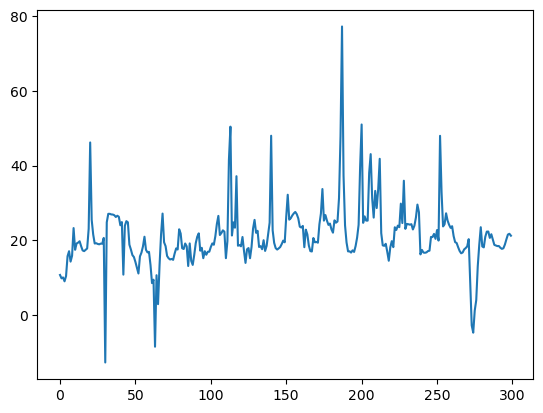

In [6]:
plt.plot(df_AEP_PSGC1_AMP.loc[:, 'RT_LMP'].to_numpy()[3000:3000+300])

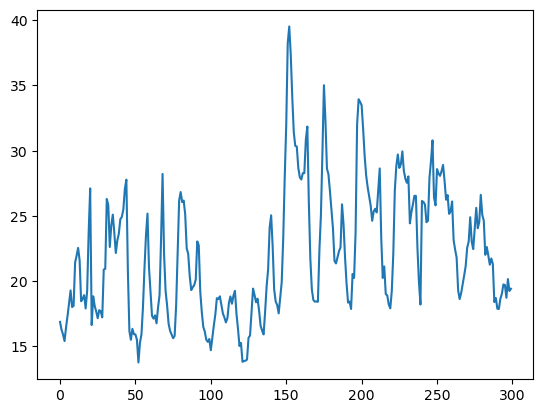

In [7]:
plt.plot(df_AEP_PSGC1_AMP.loc[:, 'DA_LMP'].to_numpy()[3000:3000+300])

In [9]:
from gym_power_trading.envs import PowerTradingEnv


In [23]:
env = PowerTradingEnv(df=df_AEP_PSGC1_AMP, window_size=24, frame_bound=(25, 100))

c:\users\chen5\rl-power-arbitrage-project\gym-power-trading\gym_power_trading\envs\power_trading.py:188: RuntimeWarning: divide by zero encountered in divide
  pct_diff = np.insert(np.where(prices[:-1] != 0, diff / prices[:-1], 0), 0, 0) # Change from price 1-tick ago


In [11]:
window_size=24; frame_bound=(25, 100)

In [12]:
start = frame_bound[0] - window_size
end = frame_bound[1]

In [13]:
# See the forecasts for 10 hours ahead (DA LMPs are released at 2pm and apply to the 24 hours of the next day, so 10 future hours are always available)

da_prices = df_AEP_PSGC1_AMP.loc[:, 'DA_LMP'].to_numpy()[start+10:end+10]


In [14]:
da_prices.shape

(99,)

In [15]:
prices = df_AEP_PSGC1_AMP.loc[:, 'RT_LMP'].to_numpy()[start:end]
diff = np.insert(np.diff(prices), 0, 0)
diff

array([ 0.000e+00,  2.800e-01, -2.600e-01,  9.000e-01,  3.510e+00,
        1.148e+01, -7.480e+00,  7.500e-01, -9.200e-01,  1.700e-01,
       -4.000e-02,  1.890e+00, -2.590e+00,  3.600e-01, -3.300e-01,
        1.190e+00, -1.190e+00,  3.750e+00,  5.064e+01, -5.484e+01,
       -1.350e+00, -1.260e+00,  5.100e-01, -2.340e+00,  5.100e-01,
        3.100e+00,  3.790e+00,  5.100e-01, -2.810e+00,  3.250e+00,
        2.527e+01, -2.781e+01, -4.300e-01,  4.323e+01, -4.459e+01,
        1.170e+00,  4.400e+00, -6.080e+00,  7.000e-01, -1.100e-01,
        5.000e-01,  1.280e+00, -2.100e+00, -7.600e-01, -8.000e-02,
       -6.600e-01,  3.700e-01, -1.940e+00, -2.200e-01,  3.180e+00,
        2.680e+00,  5.000e-02, -4.060e+00,  9.100e-01,  1.206e+01,
       -1.248e+01,  4.540e+00, -2.890e+00,  5.050e+00, -6.890e+00,
        3.980e+00, -4.860e+00,  1.900e+00,  6.450e+00, -6.200e+00,
       -2.500e-01, -1.600e-01, -6.700e-01, -1.010e+00,  7.120e+00,
        3.740e+00, -1.423e+01,  5.400e-01,  3.180e+00, -1.390e

In [16]:
signal_features = np.column_stack((prices, diff, da_prices))
signal_features

array([[ 1.251e+01,  0.000e+00,  2.045e+01],
       [ 1.279e+01,  2.800e-01,  2.095e+01],
       [ 1.253e+01, -2.600e-01,  2.178e+01],
       [ 1.343e+01,  9.000e-01,  2.188e+01],
       [ 1.694e+01,  3.510e+00,  2.118e+01],
       [ 2.842e+01,  1.148e+01,  2.084e+01],
       [ 2.094e+01, -7.480e+00,  2.115e+01],
       [ 2.169e+01,  7.500e-01,  2.382e+01],
       [ 2.077e+01, -9.200e-01,  2.376e+01],
       [ 2.094e+01,  1.700e-01,  2.149e+01],
       [ 2.090e+01, -4.000e-02,  1.966e+01],
       [ 2.279e+01,  1.890e+00,  1.887e+01],
       [ 2.020e+01, -2.590e+00,  1.810e+01],
       [ 2.056e+01,  3.600e-01,  1.696e+01],
       [ 2.023e+01, -3.300e-01,  1.621e+01],
       [ 2.142e+01,  1.190e+00,  1.594e+01],
       [ 2.023e+01, -1.190e+00,  1.614e+01],
       [ 2.398e+01,  3.750e+00,  1.793e+01],
       [ 7.462e+01,  5.064e+01,  2.162e+01],
       [ 1.978e+01, -5.484e+01,  2.504e+01],
       [ 1.843e+01, -1.350e+00,  2.466e+01],
       [ 1.717e+01, -1.260e+00,  2.452e+01],
       [ 1

In [78]:
from enum import Enum
class Actions(Enum):
    Discharge = 1
    Charge = 2
    Hold = 3


In [79]:
Actions.Hold.value

3

In [80]:
Actions.Hold

<Actions.Hold: 3>

In [83]:
Actions(3)

<Actions.Hold: 3>

In [ ]:
prices = self.df.loc[:, 'Close'].to_numpy()
#prices[self.frame_bound[0] - self.window_size]  # validate index (TODO: Improve validation)
#prices = prices[self.frame_bound[0]-self.window_size:self.frame_bound[1]]
diff = np.insert(np.diff(prices), 0, 0)
signal_features = np.column_stack((prices, diff))

return prices.astype(np.float32), signal_features.astype(np.float32)


In [5]:
prices = df_AEP_PSGC1_AMP.loc[:,'RT_LMP'].to_numpy()

In [9]:
diff = np.insert(np.diff(prices), 0, 0)

In [14]:
signal_features = np.column_stack((prices, diff))

In [15]:
signal_features

array([[10.02,  0.  ],
       [12.51,  2.49],
       [12.79,  0.28],
       ...,
       [13.76, -7.23],
       [14.66,  0.9 ],
       [13.74, -0.92]])

In [16]:
prices.astype(np.float32)

array([10.02, 12.51, 12.79, ..., 13.76, 14.66, 13.74], dtype=float32)

In [17]:
signal_features.astype(np.float32)

array([[10.02,  0.  ],
       [12.51,  2.49],
       [12.79,  0.28],
       ...,
       [13.76, -7.23],
       [14.66,  0.9 ],
       [13.74, -0.92]], dtype=float32)

In [ ]:
# Original get observation
def _get_observation(self):
    """
    Produce Observations vector for agent. Each vector has 
    window_size obervations in chronological order that include
    signal_features + battery_capacity and battery_avg_price.
    """
    # Array with dimensions (window_size x num_features)
    env_obs = self.signal_features[(self._current_tick - self.window_size + 1):self._current_tick+1]
    
    # Battery observations are array with dimensions (window_size x 1)
    # Flip to ensure chronological order with env_obs (deque stores oldest observation at index 0)
    battery_capacity = np.flip(np.array(self.battery.capacity_observation).reshape(-1, 1)) 
    battery_price = np.flip(np.array(self.battery.avg_price_observation).reshape(-1, 1))
    
    # Flatten matrix to window_size * features size array with observations in chronological order
    observation = np.column_stack((env_obs, battery_capacity, battery_price)). \
        reshape(-1, (self.shape[0])).squeeze()
    
    return observation.astype(np.float32)


In [24]:
from gym_power_trading.envs import PowerTradingEnv


In [17]:
from gym_power_trading.envs import battery


In [18]:
battery_capacity=80
battery_cont_power=20
charging_efficiency=0.95

In [19]:
battery = battery.Battery(
                battery_capacity,
                battery_cont_power,
                charging_efficiency,
                24
        )

In [20]:
battery.capacity_observation

deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      maxlen=24)

In [30]:
battery_capacity = np.flip(np.array(battery.capacity_observation).reshape(-1, 1)) 

In [31]:
battery_capacity

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [34]:
battery_price = np.flip(np.array(battery.avg_price_observation).reshape(-1, 1))
battery_price

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [18]:
_current_tick = 60
window_size = 24


In [19]:
env_obs = signal_features[(_current_tick - window_size + 1):_current_tick+1]


In [23]:
env_obs.shape, env_obs

((24, 2),
 array([[ 24.93,   4.4 ],
        [ 18.85,  -6.08],
        [ 19.55,   0.7 ],
        [ 19.44,  -0.11],
        [ 19.94,   0.5 ],
        [ 21.22,   1.28],
        [ 19.12,  -2.1 ],
        [ 18.36,  -0.76],
        [ 18.28,  -0.08],
        [ 17.62,  -0.66],
        [ 17.99,   0.37],
        [ 16.05,  -1.94],
        [ 15.83,  -0.22],
        [ 19.01,   3.18],
        [ 21.69,   2.68],
        [ 21.74,   0.05],
        [ 17.68,  -4.06],
        [ 18.59,   0.91],
        [ 30.65,  12.06],
        [ 18.17, -12.48],
        [ 22.71,   4.54],
        [ 19.82,  -2.89],
        [ 24.87,   5.05],
        [ 17.98,  -6.89]]))

In [37]:
 (24 * (signal_features.shape[1] + 2), )

(96,)

In [45]:
observation = np.column_stack((env_obs, battery_capacity, battery_price)). \
    reshape(-1, (96)).squeeze()
observation
# kind of a weird order but ok

array([ 24.93,   4.4 ,   0.  ,   0.  ,  18.85,  -6.08,   0.  ,   0.  ,
        19.55,   0.7 ,   0.  ,   0.  ,  19.44,  -0.11,   0.  ,   0.  ,
        19.94,   0.5 ,   0.  ,   0.  ,  21.22,   1.28,   0.  ,   0.  ,
        19.12,  -2.1 ,   0.  ,   0.  ,  18.36,  -0.76,   0.  ,   0.  ,
        18.28,  -0.08,   0.  ,   0.  ,  17.62,  -0.66,   0.  ,   0.  ,
        17.99,   0.37,   0.  ,   0.  ,  16.05,  -1.94,   0.  ,   0.  ,
        15.83,  -0.22,   0.  ,   0.  ,  19.01,   3.18,   0.  ,   0.  ,
        21.69,   2.68,   0.  ,   0.  ,  21.74,   0.05,   0.  ,   0.  ,
        17.68,  -4.06,   0.  ,   0.  ,  18.59,   0.91,   0.  ,   0.  ,
        30.65,  12.06,   0.  ,   0.  ,  18.17, -12.48,   0.  ,   0.  ,
        22.71,   4.54,   0.  ,   0.  ,  19.82,  -2.89,   0.  ,   0.  ,
        24.87,   5.05,   0.  ,   0.  ,  17.98,  -6.89,   0.  ,   0.  ])

In [42]:
observation[:4]

array([24.93,  4.4 ,  0.  ,  0.  ])

In [43]:
np.column_stack((env_obs, battery_capacity, battery_price))

array([[ 24.93,   4.4 ,   0.  ,   0.  ],
       [ 18.85,  -6.08,   0.  ,   0.  ],
       [ 19.55,   0.7 ,   0.  ,   0.  ],
       [ 19.44,  -0.11,   0.  ,   0.  ],
       [ 19.94,   0.5 ,   0.  ,   0.  ],
       [ 21.22,   1.28,   0.  ,   0.  ],
       [ 19.12,  -2.1 ,   0.  ,   0.  ],
       [ 18.36,  -0.76,   0.  ,   0.  ],
       [ 18.28,  -0.08,   0.  ,   0.  ],
       [ 17.62,  -0.66,   0.  ,   0.  ],
       [ 17.99,   0.37,   0.  ,   0.  ],
       [ 16.05,  -1.94,   0.  ,   0.  ],
       [ 15.83,  -0.22,   0.  ,   0.  ],
       [ 19.01,   3.18,   0.  ,   0.  ],
       [ 21.69,   2.68,   0.  ,   0.  ],
       [ 21.74,   0.05,   0.  ,   0.  ],
       [ 17.68,  -4.06,   0.  ,   0.  ],
       [ 18.59,   0.91,   0.  ,   0.  ],
       [ 30.65,  12.06,   0.  ,   0.  ],
       [ 18.17, -12.48,   0.  ,   0.  ],
       [ 22.71,   4.54,   0.  ,   0.  ],
       [ 19.82,  -2.89,   0.  ,   0.  ],
       [ 24.87,   5.05,   0.  ,   0.  ],
       [ 17.98,  -6.89,   0.  ,   0.  ]])

# more features 4/25

In [ ]:
# original
def _process_data(self): 
        # Shift 10 ticks forward to match DA dims
        prices = self.df.loc[:, 'RT_LMP'].to_numpy()[:-10] 
        # See the Day Ahead price"forecast" for 10 hours ahead 
        # (DA LMPs are released at 2pm and apply to the 24 hours of the next day, 
        #   so 10 future hours are always available)
        da_prices = self.df.loc[:, 'DA_LMP'].to_numpy()[10:] 

        diff = np.diff(prices)
        pct_diff = np.insert(np.where(prices[:-1] != 0, diff / prices[:-1], 0), 0, 0) # Change from price 1-tick ago
        prices_signal = prices / da_prices # Take ratio of current price to DA price
        signal_features = np.column_stack((prices_signal, pct_diff))

        return prices.astype(np.float32), signal_features.astype(np.float32)



In [43]:
prices

array([10.02, 12.51, 12.79, ..., 20.84, 14.81, 13.48])

In [22]:
df_AEP_PSGC1_AMP

RT_LMP  DA_LMP
MARKET_DAY NODE          TYPE    VALUE HourEnding                
2020-10-01 AEP.PSGC1.AMP Gennode LMP   1            10.02   14.33
                                       2            12.51   13.09
                                       3            12.79   12.96
                                       4            12.53   13.62
                                       5            13.43   14.49
...                                                   ...     ...
2024-03-31 AEP.PSGC1.AMP Gennode LMP   20           21.35   26.38
                                       21           20.99   25.07
                                       22           13.76   21.15
                                       23           14.66   19.03
                                       24           13.74   19.63

[30672 rows x 2 columns]

In [25]:
self = env

In [26]:
prices = self.df.loc[:, 'RT_LMP'].to_numpy()[:-10] 
# See the Day Ahead price"forecast" for 10 hours ahead 
# (DA LMPs are released at 2pm and apply to the 24 hours of the next day, 
#   so 10 future hours are always available)
da_prices = self.df.loc[:, 'DA_LMP'].to_numpy()[10:] 

diff = np.diff(prices)
pct_diff = np.insert(np.where(prices[:-1] != 0, diff / prices[:-1], 0), 0, 0) # Change from price 1-tick ago
prices_signal = prices / da_prices # Take ratio of current price to DA price
signal_features = np.column_stack((prices_signal, pct_diff))

C:\Users\chen5\AppData\Local\Temp\ipykernel_28656\3184680749.py:8: RuntimeWarning: divide by zero encountered in divide
  pct_diff = np.insert(np.where(prices[:-1] != 0, diff / prices[:-1], 0), 0, 0) # Change from price 1-tick ago


# Rolling average

<Axes: xlabel='MARKET_DAY,NODE,TYPE,VALUE,HourEnding'>

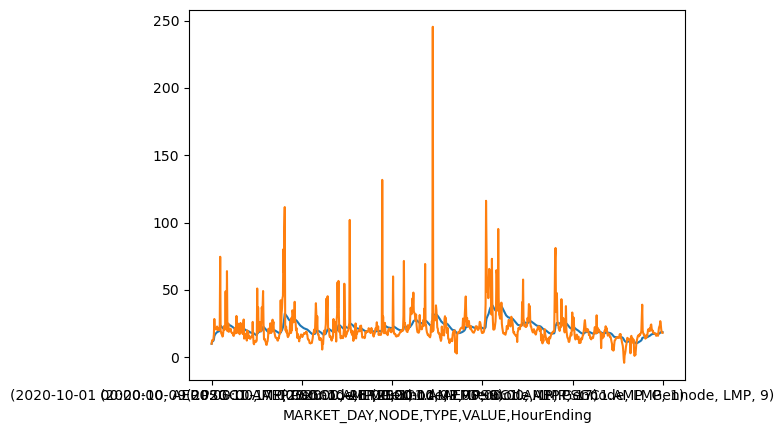

In [62]:
# self.df.loc[:, 'RT_LMP'].rolling(24*2).mean()[:1000].plot()
self.df.loc[:, 'RT_LMP'].ewm(span = 24*2).mean()[:1000].plot()

self.df.loc[:, 'RT_LMP'][:1000].plot()

<Axes: xlabel='MARKET_DAY,NODE,TYPE,VALUE,HourEnding'>

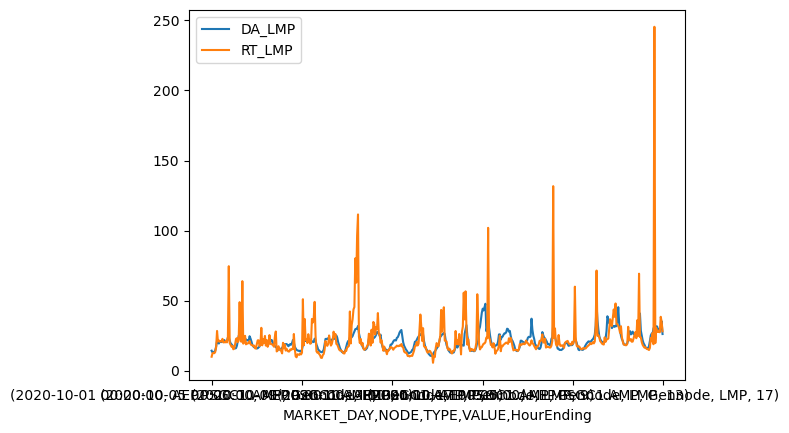

In [68]:
self.df.loc[:, ['DA_LMP','RT_LMP']][:500].plot()

In [65]:
prices.shape

(30662,)

In [77]:
ewma = self.df.loc[:, 'RT_LMP'][:-10].ewm(span = 24*2).mean().to_numpy()

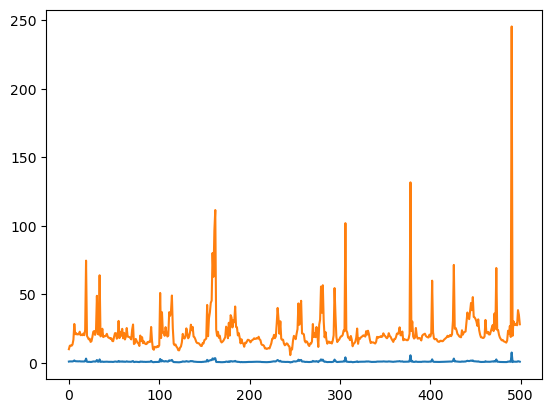

In [81]:
plt.plot((prices/ewma)[:500])
plt.plot(prices[:500])


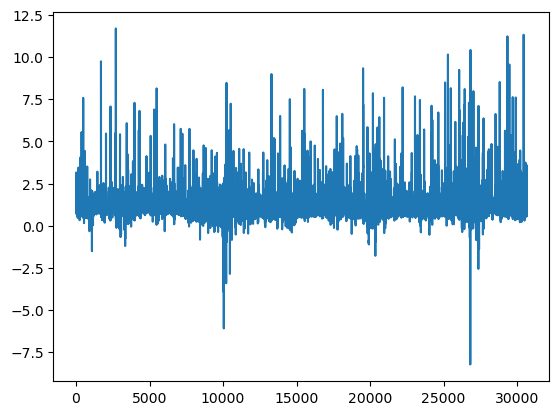

In [104]:
plt.plot((prices/np.maximum(ewma,10))) # seems more stationary


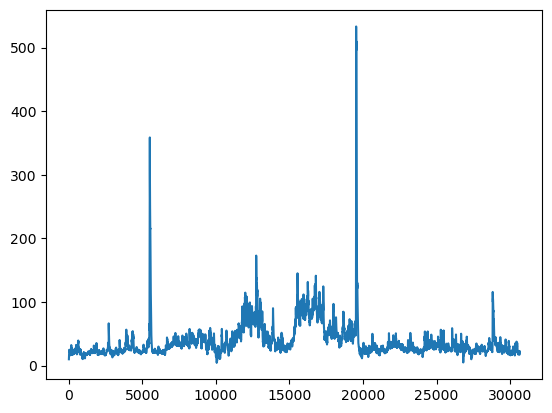

In [108]:
plt.plot(np.maximum(ewma,5))

(array([2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        4.000e+00, 8.000e+00, 2.100e+01, 2.500e+01, 4.900e+01, 8.400e+01,
        1.730e+02, 4.250e+02, 1.967e+03, 5.661e+03, 5.948e+03, 3.408e+03,
        2.522e+03, 1.885e+03, 1.394e+03, 1.194e+03, 9.410e+02, 7.680e+02,
        5.510e+02, 4.500e+02, 4.330e+02, 4.010e+02, 3.280e+02, 2.930e+02,
        2.230e+02, 2.050e+02, 1.730e+02, 1.470e+02, 1.270e+02, 1.000e+02,
        8.000e+01, 8.600e+01, 6.000e+01, 5.500e+01, 3.300e+01, 2.200e+01,
        3.900e+01, 2.200e+01, 2.400e+01, 2.200e+01, 2.000e+01, 1.200e+01,
        1.100e+01, 1.200e+01, 7.000e+00, 6.000e+00, 1.200e+01, 6.000e+00,
        8.000e+00, 9.000e+00, 5.000e+00, 1.400e+01, 8.000e+00, 6.000e+00,
        1.000e+01, 1.000e+01, 5.000e+00, 4.000e+00, 7.000e+00, 7.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        4.000e+00, 2.000e+00, 4.000e+0

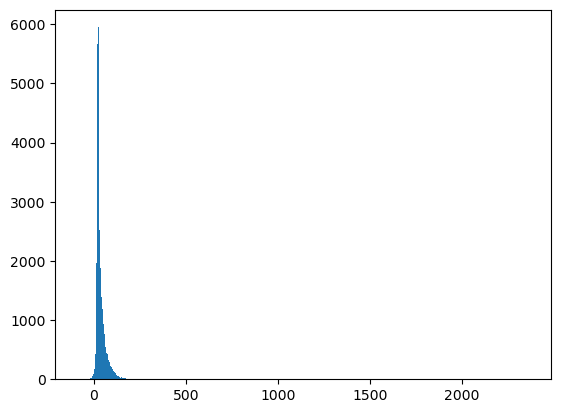

In [101]:
plt.hist(prices,bins = 500)

In [102]:
prices.mean()

38.372577783575764

In [99]:
(prices<0).sum()

167

In [97]:
np.maximum(ewma,1)

array([10.02      , 11.2909375 , 11.81158687, ..., 22.58985147,
       22.27230652, 21.91343686])

In [96]:
ewma

array([10.02      , 11.2909375 , 11.81158687, ..., 22.58985147,
       22.27230652, 21.91343686])

In [74]:
prices

array([10.02, 12.51, 12.79, ..., 20.84, 14.81, 13.48])

### My recommendation
Give it the prices, and the DA information for the number of windows ahead
So generally has window_size 

In [ ]:
#     diff = np.diff(prices)
#     pct_diff = np.insert(np.where(prices[:-1] != 0, diff / prices[:-1], 0), 0, 0) # Change from price 1-tick ago
#     prices_signal = prices / da_prices # Take ratio of current price to DA price


In [113]:
da_lookahead = min(10,self.window_size)
self.window_size

24

In [114]:
da_lookahead

10

In [118]:
self.df.loc[:, 'DA_LMP'].to_numpy()[:20]

array([14.33, 13.09, 12.96, 13.62, 14.49, 17.38, 21.28, 20.44, 19.43,
       20.86, 21.18, 20.45, 20.95, 21.78, 21.88, 21.18, 20.84, 21.15,
       23.82, 23.76])

In [120]:
self.df.loc[:, 'DA_LMP'].to_numpy()[da_lookahead-1:-1].shape

(30662,)

In [121]:
def _process_data(self): 
    # Shift 10 ticks forward to match DA dims
    da_lookahead = min(10,self.window_size) # if only use window = 3, only look 3 hours ahead - window size changes meaning of da prices
    prices = self.df.loc[:, 'RT_LMP'].to_numpy()[:-da_lookahead] 
    # See the Day Ahead price"forecast" for 10 hours ahead 
    # (DA LMPs are released at 2pm and apply to the 24 hours of the next day, 
    #   so 10 future hours are always available)
    da_prices = self.df.loc[:, 'DA_LMP'].to_numpy()[da_lookahead-1:-1] #-1 so always sees DA price for current hour
    ewma = self.df.loc[:, 'RT_LMP'][:-10].ewm(span = 24*2).mean().to_numpy()
    price_div_ewma = (prices/np.maximum(ewma,10))

    # signal_features = np.column_stack((prices, da_prices, ewma, price_div_ewma))
    signal_features = np.column_stack((prices, price_div_ewma))

    return prices.astype(np.float32), signal_features.astype(np.float32)


In [136]:
    def _get_observation(self):
        """
        Produce Observations vector for agent. Each vector has 
        window_size obervations in chronological order that include
        signal_features + battery_capacity and battery_avg_price.
        """
        # Array with dimensions (window_size x num_features)
        env_obs = self.signal_features[(self._current_tick - self.window_size + 1):self._current_tick + 1]
        
        # Battery observations are array with dimensions (1)
        battery_capacity = np.array(self.battery.capacity_observation)[-1]
        battery_avg_charge_price = np.array(self.battery.avg_price_observation)[-1]
        
        # Flatten matrix to (1, window_size * features size) array with observations in chronological order
        observation = np.column_stack((env_obs)). \
            flatten()
        observation = np.append(observation,[battery_capacity,battery_avg_charge_price])
        return observation


In [140]:
        self.shape = (window_size * (self.signal_features.shape[1]) + 2, )

In [139]:
_get_observation(self)

array([ 1.96678448e+00,  2.16244006e+00,  3.88625264e+00,  2.62088704e+00,
        4.04568148e+00,  2.03072810e+00,  1.08804667e+00,  1.09649122e+00,
        8.02083313e-01,  4.76870745e-01,  4.95532870e-01,  4.22416151e-01,
        3.49348128e-01,  3.38524044e-01,  3.29305142e-01,  3.58021975e-01,
        4.22594130e-01,  1.93342781e+00,  1.13391697e+00,  5.12772262e-01,
        4.95927006e-01,  6.45224154e-01,  7.84816027e-01,  9.41662371e-01,
        1.38474727e+00,  1.33668706e-01,  7.65134692e-01, -3.42072189e-01,
        5.46943247e-01, -4.63655621e-01, -3.86184216e-01,  2.05787778e-01,
       -2.47111112e-01, -1.72373086e-01,  1.07703283e-01, -2.57566012e-03,
       -6.58489317e-02,  3.66275050e-02, -5.53333350e-02,  1.49611861e-01,
        2.40024552e-01,  1.70297027e+00, -3.59523803e-01, -4.54675436e-01,
       -2.01887786e-01,  8.73850212e-02,  1.81268882e-02,  8.24925825e-02,
        0.00000000e+00,  0.00000000e+00])

In [129]:
self._current_tick = 300

In [124]:
_process_data(self)[1].shape

(30662, 4)

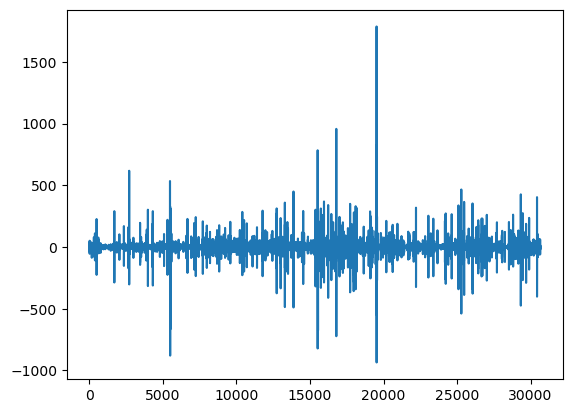

In [109]:
plt.plot(diff)

In [52]:
prices.shape

(30662,)

In [30]:
da_prices.shape

(30662,)

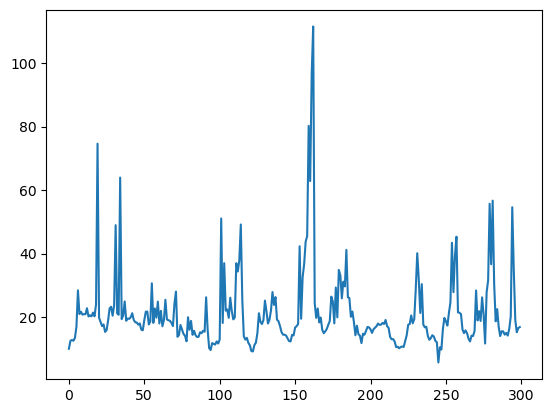

In [36]:

plt.plot(prices[:300])

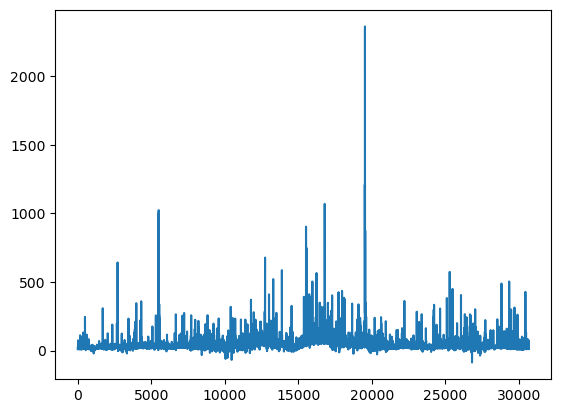

In [40]:
plt.plot(prices)

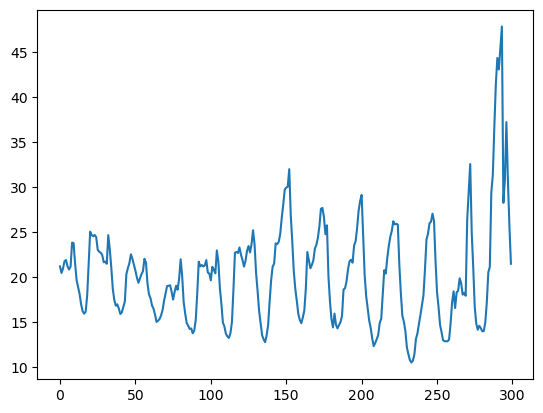

In [37]:
plt.plot(da_prices[:300])

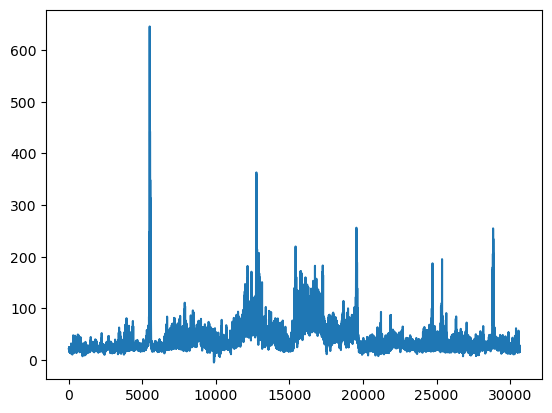

In [41]:
plt.plot(da_prices)

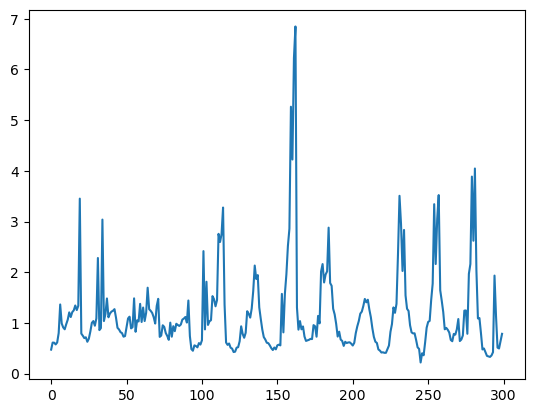

In [39]:
plt.plot(prices_signal[:300])

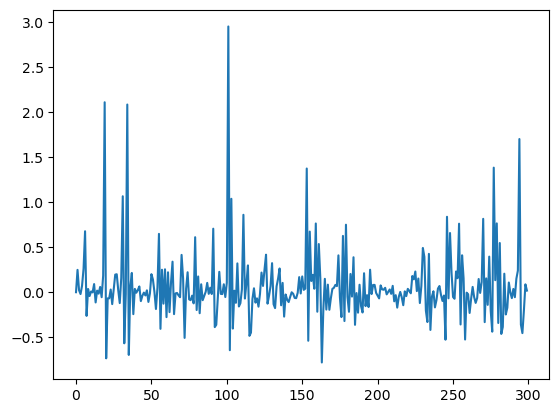

In [34]:
plt.plot(pct_diff[:300])